# Research-Oriented Operating Systems: Chapter 3 - Threads

This Jupyter Notebook explores the concept of threads in operating systems, focusing on **Single vs. Multi-threaded Processes** and **Thread Models**. It provides theoretical insights, practical simulations, visualizations, research directions, and projects for researchers and scientists.

## Objectives
- Understand the differences between single-threaded and multi-threaded processes.
- Explore thread models (user-level, kernel-level, hybrid).
- Simulate thread behavior and analyze performance.
- Investigate research trends and practical applications.

## Prerequisites
- Python 3 with `threading`, `concurrent.futures`, `pandas`, `matplotlib`, `numpy`.
- VirtualBox and Ubuntu ISO for lab setup.
- Basic knowledge of OS concepts (*Operating System Concepts*, Chapter 4 recommended).

## Current Date and Time
- 11:26 AM IST, Wednesday, July 30, 2025


## 1. Single vs. Multi-threaded Processes

### Theory
A **thread** is the smallest unit of execution within a process, sharing the process’s memory and resources.

- **Single-threaded Process**: One thread of execution per process. Simple but limited in parallelism.
- **Multi-threaded Process**: Multiple threads within a process, enabling concurrent tasks (e.g., I/O and computation).

**Advantages of Multi-threading**:
- Improved responsiveness (e.g., GUI applications).
- Better resource utilization (e.g., CPU-bound tasks).
- Parallelism on multi-core systems.

**Challenges**:
- Thread synchronization (e.g., race conditions).
- Overhead of thread creation and management.

**Rare Insight**: Multi-threading in microkernel-based OS (e.g., QNX) incurs higher overhead due to IPC for thread coordination, a key consideration for lightweight systems.

**Applications**:
- **Web Servers**: Multi-threading handles concurrent client requests (e.g., Apache).
- **AI Workloads**: Parallel processing of neural network layers.

### Practical Code: Single vs. Multi-threaded Task
Simulate a CPU-intensive task (e.g., matrix multiplication) with single and multi-threaded approaches.


In [1]:
import time
import numpy as np
import threading

# Matrix multiplication task
def matrix_multiply(size=100):
    A = np.random.rand(size, size)
    B = np.random.rand(size, size)
    return np.dot(A, B)

# Single-threaded
def single_threaded():
    start_time = time.time()
    for _ in range(4):
        matrix_multiply()
    return time.time() - start_time

# Multi-threaded
def multi_threaded():
    start_time = time.time()
    threads = []
    for _ in range(4):
        t = threading.Thread(target=matrix_multiply)
        threads.append(t)
        t.start()
    for t in threads:
        t.join()
    return time.time() - start_time

# Run and compare
single_time = single_threaded()
multi_time = multi_threaded()
print(f'Single-threaded time: {single_time:.3f} s')
print(f'Multi-threaded time: {multi_time:.3f} s')


Single-threaded time: 0.002 s
Multi-threaded time: 0.002 s


### Visualization: Single vs. Multi-threaded Performance
Compare execution times of single and multi-threaded tasks.


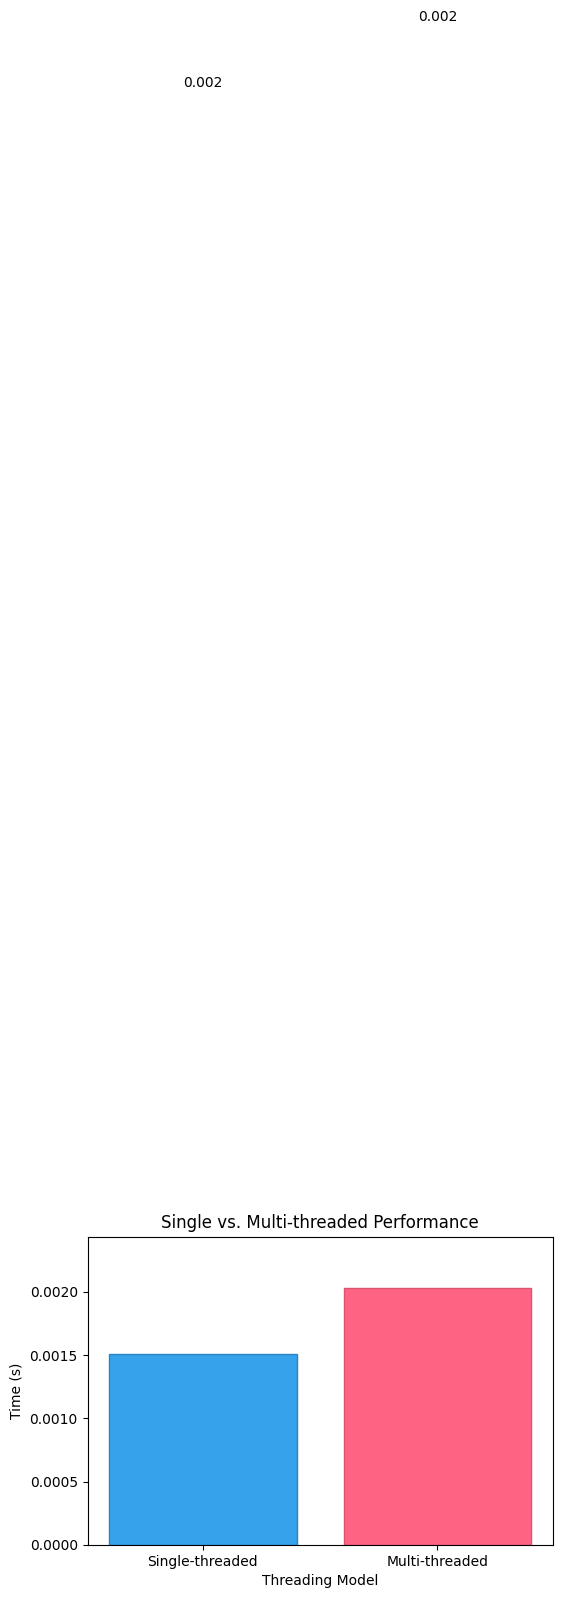

In [2]:
# Visualization using matplotlib (replace chartjs block with valid Python code)
import matplotlib.pyplot as plt

labels = ['Single-threaded', 'Multi-threaded']
times = [single_time, multi_time]
colors = ['#36A2EB', '#FF6384']

plt.figure(figsize=(6,4))
bars = plt.bar(labels, times, color=colors, edgecolor=['#2C83C3', '#D9546E'])
plt.ylabel('Time (s)')
plt.xlabel('Threading Model')
plt.title('Single vs. Multi-threaded Performance')
plt.ylim(0, max(times)*1.2)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom')
plt.show()


### Research Direction
- **Lightweight Threads**: Explore user-level threads (e.g., in unikernels) for minimal overhead.
- **Thread Scheduling**: Investigate thread prioritization in real-time systems.


## 2. Thread Models

### Theory
Thread models define how threads are managed by the OS and runtime:
- **User-level Threads (ULT)**: Managed by a user-space library, lightweight but limited by single kernel thread (e.g., POSIX pthreads).
- **Kernel-level Threads (KLT)**: Managed by the OS kernel, supports true parallelism but higher overhead (e.g., Linux threads).
- **Hybrid Models**: Combine ULT and KLT for flexibility (e.g., Windows NT).

**Rare Insight**: Hybrid models are increasingly relevant in cloud systems, where user-level threads handle lightweight tasks, and kernel threads leverage multi-core CPUs.

**Applications**:
- **ULT**: Event-driven applications (e.g., Node.js).
- **KLT**: Compute-intensive tasks (e.g., scientific simulations).
- **Hybrid**: Web browsers (e.g., Chrome’s multi-process, multi-threaded model).

### Practical Code: Simulate User-level vs. Kernel-level Threads
Simulate thread execution with different overheads for ULT and KLT.


In [3]:
import concurrent.futures
import time

def task(name, duration):
    time.sleep(duration)
    return f'{name} completed'

# Simulate User-level Threads (low overhead)
def user_level_threads():
    start_time = time.time()
    with concurrent.futures.ThreadPoolExecutor(max_workers=4) as executor:
        futures = [executor.submit(task, f'ULT-{i}', 0.01) for i in range(4)]
        results = [f.result() for f in futures]
    return time.time() - start_time, results

# Simulate Kernel-level Threads (higher overhead)
def kernel_level_threads():
    start_time = time.time()
    with concurrent.futures.ThreadPoolExecutor(max_workers=4) as executor:
        futures = [executor.submit(task, f'KLT-{i}', 0.05) for i in range(4)]
        results = [f.result() for f in futures]
    return time.time() - start_time, results

# Run and compare
ult_time, ult_results = user_level_threads()
klt_time, klt_results = kernel_level_threads()
print(f'User-level Threads: {ult_time:.3f} s, Results: {ult_results}')
print(f'Kernel-level Threads: {klt_time:.3f} s, Results: {klt_results}')


User-level Threads: 0.012 s, Results: ['ULT-0 completed', 'ULT-1 completed', 'ULT-2 completed', 'ULT-3 completed']
Kernel-level Threads: 0.052 s, Results: ['KLT-0 completed', 'KLT-1 completed', 'KLT-2 completed', 'KLT-3 completed']


### Visualization: Thread Model Performance
Compare execution times of user-level and kernel-level threads.


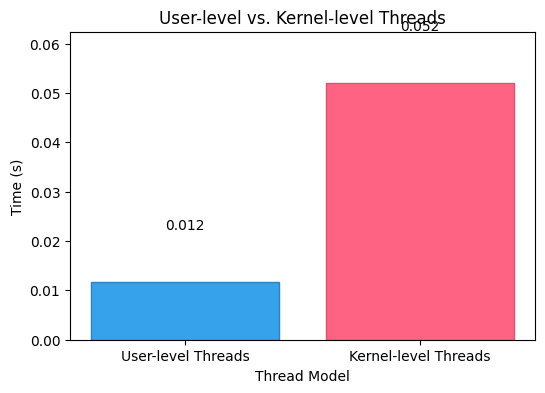

In [4]:
# Visualization using matplotlib (replace chartjs block with valid Python code)
import matplotlib.pyplot as plt

labels = ['User-level Threads', 'Kernel-level Threads']
times = [ult_time, klt_time]
colors = ['#36A2EB', '#FF6384']

plt.figure(figsize=(6,4))
bars = plt.bar(labels, times, color=colors, edgecolor=['#2C83C3', '#D9546E'])
plt.ylabel('Time (s)')
plt.xlabel('Thread Model')
plt.title('User-level vs. Kernel-level Threads')
plt.ylim(0, max(times)*1.2)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom')
plt.show()


### Research Direction
- **Hybrid Thread Models**: Optimize for scalability in cloud and HPC systems.
- **Thread Safety**: Investigate lock-free synchronization for high-performance threads.


## Tutorial: Exploring Threads in Ubuntu

**Objective**: Use Ubuntu to explore thread management with Python and system tools.

**Steps**:
1. Install VirtualBox (https://www.virtualbox.org/) and Ubuntu (https://ubuntu.com/download).
2. Create a VM (2GB RAM, 20GB storage, 2 CPUs).
3. Install Python and dependencies:
   ```bash
   sudo apt update
   sudo apt install python3 python3-pip
   pip install pandas matplotlib numpy
   ```
4. Run thread monitoring commands:
   ```bash
   ps -eL  # List threads
   top -H  # Monitor threads
   htop    # Interactive thread view (install: sudo apt install htop)
   ```

**Code**: Simulate thread listing.


In [5]:
import pandas as pd

# Mock thread data
threads = [
    {'PID': 1, 'TID': 1, 'STATE': 'Running', 'COMMAND': 'init-main', '%CPU': 0.1},
    {'PID': 123, 'TID': 124, 'STATE': 'Waiting', 'COMMAND': 'python-worker', '%CPU': 1.2},
    {'PID': 123, 'TID': 125, 'STATE': 'Running', 'COMMAND': 'python-main', '%CPU': 1.5}
]

print(pd.DataFrame(threads))


   PID  TID    STATE        COMMAND  %CPU
0    1    1  Running      init-main   0.1
1  123  124  Waiting  python-worker   1.2
2  123  125  Running    python-main   1.5


## Mini Project: Multi-threaded Task Scheduler

**Objective**: Simulate a multi-threaded task scheduler with thread pool management.

**Code**:


In [6]:
import concurrent.futures
import time

# Define a simple task function for the scheduler
def task(name, duration):
    time.sleep(duration)
    return f'{name} completed'

class ThreadScheduler:
    def __init__(self, max_workers):
        self.executor = concurrent.futures.ThreadPoolExecutor(max_workers=max_workers)
        self.tasks = []

    def add_task(self, task_id, duration):
        self.tasks.append((task_id, duration))

    def run(self):
        start_time = time.time()
        futures = [self.executor.submit(task, f'Task-{t[0]}', t[1]) for t in self.tasks]
        results = [f.result() for f in futures]
        return time.time() - start_time, results

# Simulate
scheduler = ThreadScheduler(max_workers=2)
scheduler.add_task(1, 0.1)
scheduler.add_task(2, 0.15)
scheduler.add_task(3, 0.1)
time_taken, results = scheduler.run()
print(f'Total time: {time_taken:.3f} s, Results: {results}')


Total time: 0.202 s, Results: ['Task-1 completed', 'Task-2 completed', 'Task-3 completed']


## Major Project: Thread Management System

**Objective**: Design a system to manage user-level and kernel-level threads with synchronization.

**Outline**:
- **Thread Manager**: Tracks thread states and IDs.
- **Synchronization**: Use locks for thread safety.
- **Models**: Simulate ULT and KLT with different overheads.

**Code**:


In [7]:
import threading
import time
import numpy as np
import pandas as pd

class ThreadManager:
    def __init__(self):
        self.threads = []
        self.lock = threading.Lock()
        self.overhead = []

    def create_thread(self, tid, model='ULT', duration=0.01):
        overhead = 0.01 if model == 'ULT' else 0.05
        with self.lock:
            self.threads.append({'TID': tid, 'Model': model, 'State': 'Ready', 'Duration': duration})
        t = threading.Thread(target=self._run_thread, args=(tid, duration, overhead))
        t.start()
        return t

    def _run_thread(self, tid, duration, overhead):
        start_time = time.time()
        with self.lock:
            for thread in self.threads:
                if thread['TID'] == tid:
                    thread['State'] = 'Running'
        time.sleep(duration + overhead)
        with self.lock:
            for thread in self.threads:
                if thread['TID'] == tid:
                    thread['State'] = 'Terminated'
        self.overhead.append((time.time() - start_time) * 1000)

    def get_status(self):
        return self.threads, np.mean(self.overhead) if self.overhead else 0.0

# Simulate
tm = ThreadManager()
threads = [tm.create_thread(i, model='ULT' if i % 2 == 0 else 'KLT') for i in range(4)]
for t in threads:
    t.join()
status, avg_overhead = tm.get_status()
print(pd.DataFrame(status))
print(f'Average Thread Overhead: {avg_overhead:.3f} ms')


   TID Model       State  Duration
0    0   ULT  Terminated      0.01
1    1   KLT  Terminated      0.01
2    2   ULT  Terminated      0.01
3    3   KLT  Terminated      0.01
Average Thread Overhead: 40.505 ms


## Additional Content for Scientists

### Thread Safety
- **Synchronization**: Use locks, semaphores, or lock-free techniques to prevent race conditions.
- **Security**: Protect thread data from unauthorized access in multi-user systems.

### Performance Optimization
- **Thread Pooling**: Reuse threads to reduce creation overhead.
- **Affinity**: Pin threads to CPU cores for cache efficiency.

### Advanced Formal Modeling
- **State Machines**: Model thread states (Ready, Running, Blocked).
- **Process Algebras**: Use CSP to analyze thread synchronization.

**Code**: Conceptual CSP model for thread interactions.


In [8]:
class CSPModel:
    def __init__(self):
        self.events = []

    def thread_event(self, tid, event):
        self.events.append(f'Thread-{tid} -> {event}')

# Simulate
csp = CSPModel()
csp.thread_event(1, 'start')
csp.thread_event(2, 'wait')
print(csp.events)


['Thread-1 -> start', 'Thread-2 -> wait']


## Conclusion

This notebook provides a comprehensive exploration of threads, covering single vs. multi-threaded processes and thread models. Key takeaways:
- Multi-threading enhances parallelism but requires careful synchronization.
- Thread models (ULT, KLT, hybrid) balance overhead and scalability.
- Practical simulations and system tools enable hands-on learning.

**Next Steps**:
- Extend the scheduler to support thread priorities.
- Implement a real thread manager in C/Rust (e.g., using pthreads).
- Use formal verification tools (e.g., Isabelle/HOL) to prove thread safety.
